In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('diabetes.csv')

# 1)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Display the first few rows of the dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Get descriptive statistics of the variables
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Calculate the correlation matrix
corr_matrix = data.corr()

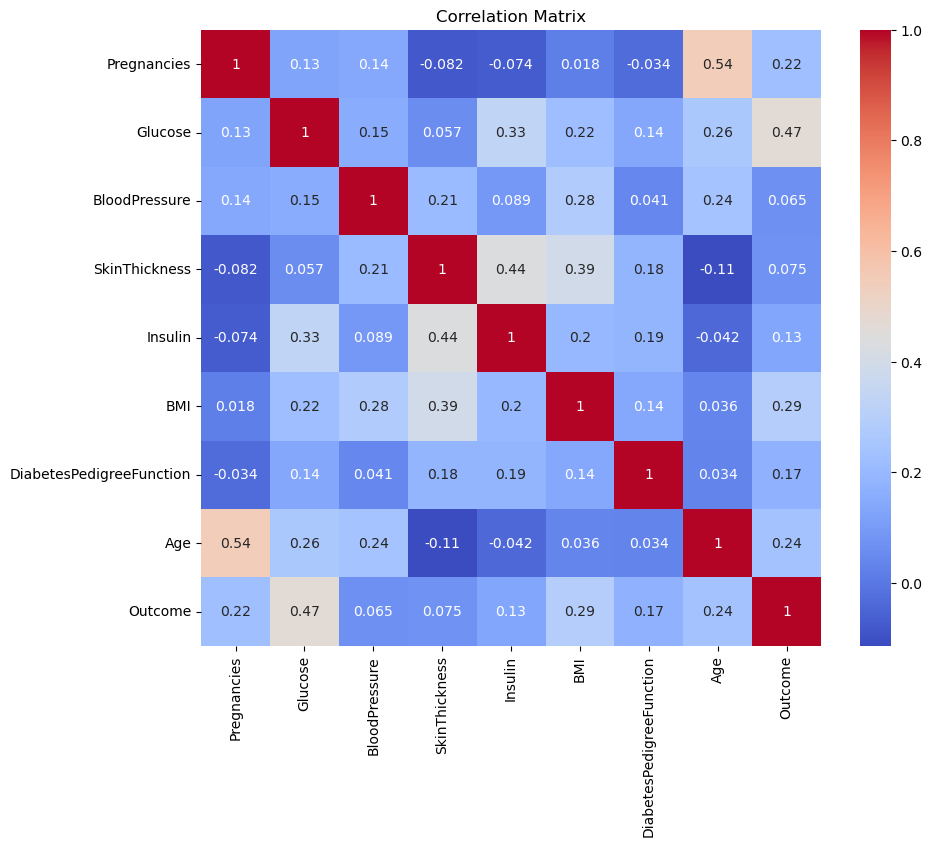

In [7]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

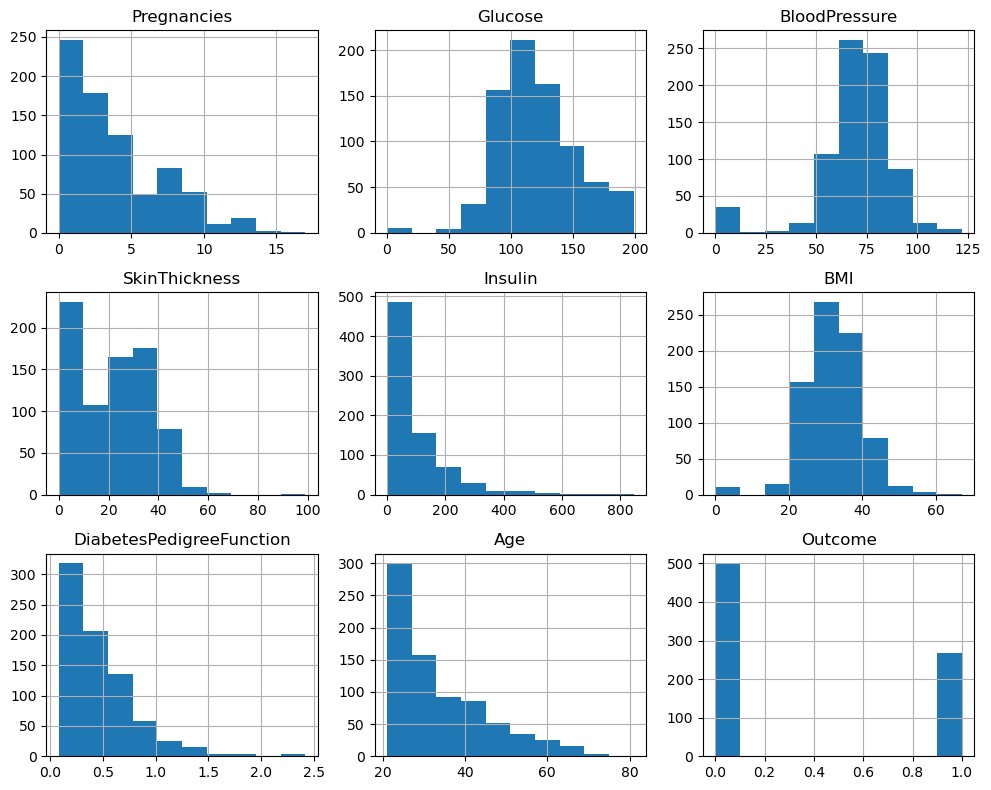

In [8]:
# Plot histograms of the variables
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

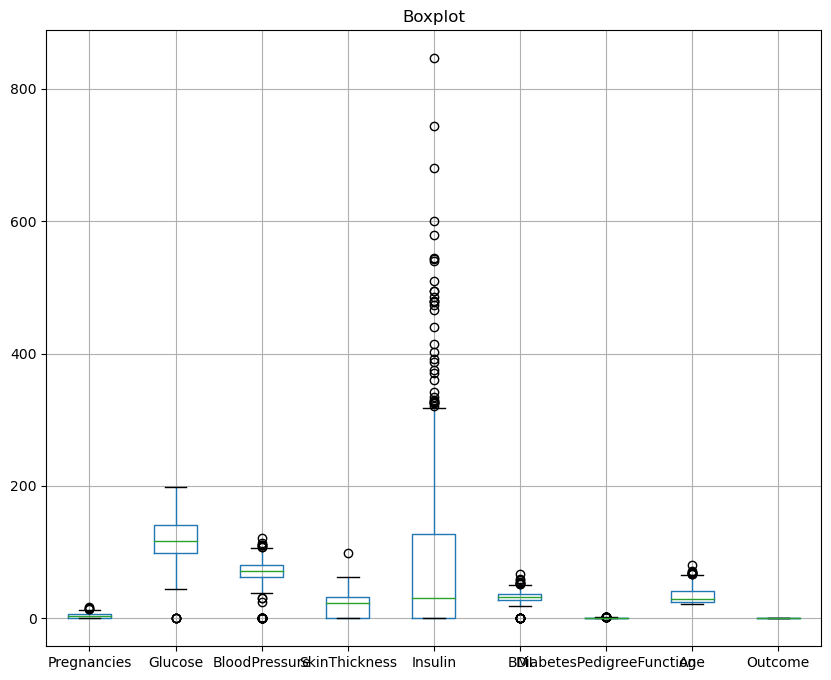

In [9]:
# Plot boxplots to visualize the distributions and outliers
plt.figure(figsize=(10, 8))
data.boxplot()
plt.title('Boxplot')
plt.show()

# 2)

1) Handling missing values:

In [10]:
# Check for missing values
print(data.isnull().sum())

# Replace missing values with mean imputation
data = data.fillna(data.mean())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


2) Removing outliers:

In [11]:
from scipy.stats import zscore

# Calculate the z-scores for each numerical column
z_scores = zscore(data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])

# Define a threshold for outlier detection
threshold = 3

# Identify the indices of outliers
outlier_indices = (abs(z_scores) > threshold).any(axis=1)

# Remove outliers from the dataset
data = data[~outlier_indices]

3) Transforming categorical variables:

In [12]:
# Perform one-hot encoding on the 'Pregnancies' variable
data_encoded = pd.get_dummies(data, columns=['Pregnancies'], drop_first=True)

# 3)

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('diabetes.csv')

# Separate the features (X) and the target variable (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets (70% training, 30% testing)
random_seed = 42  # Set the random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)

# Verify the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (537, 8)
X_test shape: (231, 8)
y_train shape: (537,)
y_test shape: (231,)


# 4)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
data = pd.read_csv('diabetes.csv')

# Separate the features (X) and the target variable (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best Score: 0.7523710626514365


# 5)

Accuracy: 0.7012987012987013
Precision: 0.5555555555555556
Recall: 0.6875
F1 Score: 0.6145251396648045


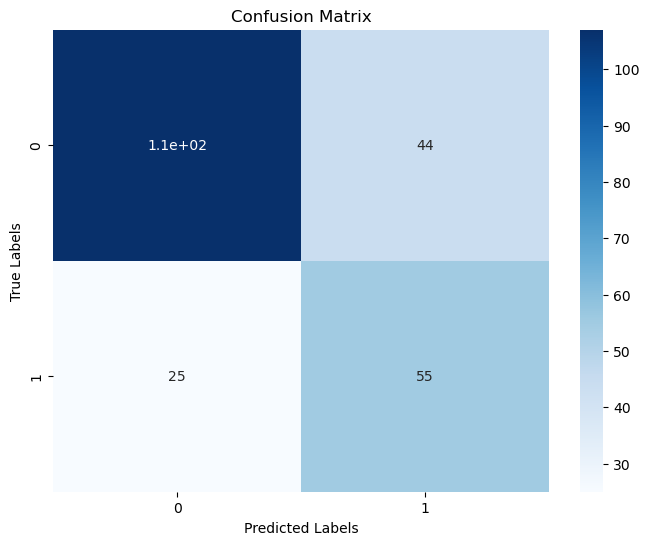

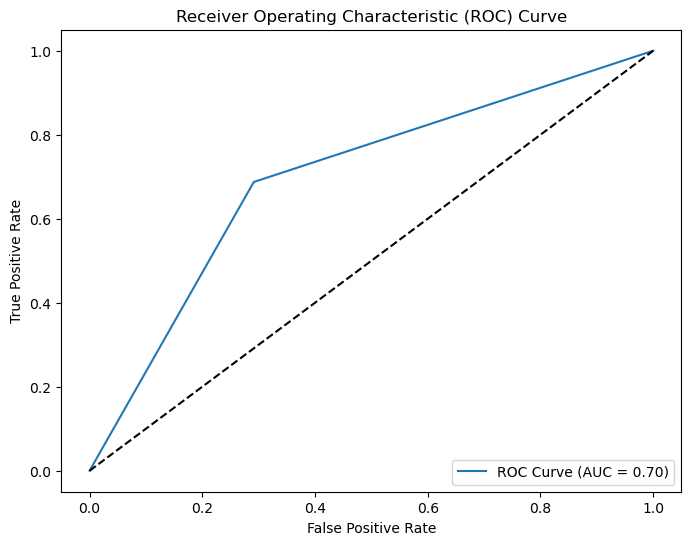

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('diabetes.csv')

# Separate the features (X) and the target variable (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate the predicted probabilities for ROC curve
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# 6)

In [3]:
from sklearn.tree import export_text

# Export the decision tree as text
tree_rules = export_text(clf, feature_names=X.columns.tolist())
print(tree_rules)

|--- Glucose <= 154.50
|   |--- Age <= 28.50
|   |   |--- Glucose <= 127.50
|   |   |   |--- BMI <= 49.10
|   |   |   |   |--- BMI <= 31.40
|   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.67
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- DiabetesPedigreeFunction >  0.67
|   |   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.70
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- DiabetesPedigreeFunction >  0.70
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- BMI >  31.40
|   |   |   |   |   |--- Insulin <= 9.00
|   |   |   |   |   |   |--- Glucose <= 111.50
|   |   |   |   |   |   |   |--- SkinThickness <= 40.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- SkinThickness >  40.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Glucose >  111.50
|   |   |   |   |   |   |   |--- BloodPressure <= 72.00
|   |   |   |   |   |   |   |   |--- BMI <= 37.40
|   |   |   |   |  

By examining these rules, we can identify the most important variables based on the top splits and the associated thresholds. For example, in the first split, the most important variable appears to be 'Glucose', with a threshold of '127.50'. The subsequent splits and branches further refine the decision process based on other variables such as 'BMI', 'Age', and 'DiabetesPedigreeFunction'.

# 7)

Validating the decision tree model involves assessing its performance on new data or testing its robustness to changes in the dataset or the environment. Sensitivity analysis and scenario testing can be employed to explore uncertainty and risks associated with the model.                                                                                                                   

Here are some approaches to validate and assess the decision tree model:

1) Cross-validation: Cross-validation is a common technique to assess the model's performance on new data. Instead of a single train-test split, the dataset is divided into multiple folds, and the model is trained and evaluated on different combinations of training and testing sets. This provides a more reliable estimate of the model's performance and helps assess its generalizability.

2) Out-of-sample testing: Apart from cross-validation, it is valuable to test the model on completely new data that was not used during training. This can be achieved by collecting additional data or obtaining external datasets that are similar to the original data. Applying the model to this new data helps evaluate its performance and generalization capability in real-world scenarios.

3) Robustness testing: Robustness testing involves assessing the model's performance under different conditions or changes in the dataset or environment. This can be done by introducing variations in the input variables, such as introducing noise, missing values, or outliers. By evaluating the model's performance on these perturbed datasets, we can gain insights into its stability and ability to handle different scenarios.

4) Sensitivity analysis: Sensitivity analysis helps understand the impact of changes in input variables on the model's predictions. By systematically varying the values of one or more input variables while keeping the rest fixed, we can observe how the model's predictions change. This analysis provides insights into the sensitivity of the model to different variables and can help identify the most influential features.

5) Scenario testing: Scenario testing involves evaluating the model's performance under specific scenarios or hypothetical situations. For example, you can define different scenarios that represent high-risk or critical situations and assess how the model performs in those cases. This helps understand the model's behavior in different contexts and its ability to handle various risk levels.

It's important to note that validation and testing are ongoing processes, and it's advisable to periodically update and re-evaluate the model as new data becomes available or the environment changes. This ensures that the model remains reliable and performs well over time.                                                                                                         

By applying these validation techniques and exploring uncertainties and risks through sensitivity analysis and scenario testing, we can gain a better understanding of the decision tree model's performance, limitations, and its suitability for the intended purpose.